### Nivell 1

- Exercici 1

Agafa el conjunt de dades que vulguis i realitza un pipeline i un gridsearch aplicant l'algorisme de Random Forest.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
df = pd.read_csv('hyundai.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0


+ la idea d'aquest dataset es intentar predir el preu del cotxe en funcio de les altres variables

In [3]:
# convertim variables categoriques fent servir OneHotEncoder
df1 =pd.get_dummies(data=df,columns=['model','transmission','fuelType'], prefix_sep='_')

In [4]:
df1.head()

,year,price,mileage,tax(£),mpg,engineSize,model_ Accent,model_ Amica,model_ Getz,model_ I10,model_ I20,model_ I30,model_ I40,model_ I800,model_ IX20,model_ IX35,model_ Ioniq,model_ Kona,model_ Santa Fe,model_ Terracan,model_ Tucson,model_ Veloster,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,7999,17307,145,58.9,1.2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,2016,14499,25233,235,43.5,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
2,2016,11399,37877,30,61.7,1.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
3,2016,6499,23789,20,60.1,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,2015,10199,33177,160,51.4,2.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [5]:
X = df1.drop('price',axis=1)
y = df1['price']

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [7]:
steps = [('rf', RandomForestRegressor())]
pipeline = Pipeline(steps)

In [8]:
#anem a mirar els diferents parametres que accepta
pipeline.get_params()

{'memory': None,
 'steps': [('rf', RandomForestRegressor())],
 'verbose': False,
 'rf': RandomForestRegressor(),
 'rf__bootstrap': True,
 'rf__ccp_alpha': 0.0,
 'rf__criterion': 'mse',
 'rf__max_depth': None,
 'rf__max_features': 'auto',
 'rf__max_leaf_nodes': None,
 'rf__max_samples': None,
 'rf__min_impurity_decrease': 0.0,
 'rf__min_impurity_split': None,
 'rf__min_samples_leaf': 1,
 'rf__min_samples_split': 2,
 'rf__min_weight_fraction_leaf': 0.0,
 'rf__n_estimators': 100,
 'rf__n_jobs': None,
 'rf__oob_score': False,
 'rf__random_state': None,
 'rf__verbose': 0,
 'rf__warm_start': False}

In [9]:
parameters = {'rf__n_estimators':[75,100,200,400],
              'rf__min_samples_leaf':[0.05,0.1,0.15,0.2],
              'rf__max_depth':[3,6,8,10]}

In [10]:
grid = GridSearchCV(estimator = pipeline, param_grid = parameters, cv=5)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [12]:
grid.fit(X_train, y_train)
print ("score = %3.2f" %(grid.score(X_test,y_test)))
print ("Best Hyperparameters:", grid.best_params_)


score = 0.72
Best Hyperparameters: {'rf__max_depth': 8, 'rf__min_samples_leaf': 0.05, 'rf__n_estimators': 100}


- Exercici 2

Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules

In [90]:
import nltk

In [110]:
url = 'https://www.gutenberg.org/files/43/43-0.txt'

In [128]:
with open('english_text.txt','r') as f:
    raw = f.read()

In [129]:
raw[:100]

'Mr. Utterson the lawyer was a man of a rugged countenance that was\nnever lighted by a smile; cold, s'

In [132]:
from nltk.tokenize import word_tokenize

In [133]:
tokenized_words = word_tokenize(raw.lower())
len(tokenized_words)

30578

In [134]:
tokenized_words[:20]

['mr.',
 'utterson',
 'the',
 'lawyer',
 'was',
 'a',
 'man',
 'of',
 'a',
 'rugged',
 'countenance',
 'that',
 'was',
 'never',
 'lighted',
 'by',
 'a',
 'smile',
 ';',
 'cold']

[(',', 2048), ('the', 1599), ('and', 969), ('of', 933), ('.', 885), ('to', 638), ('i', 638), ('a', 625), (';', 527), ('was', 468)]


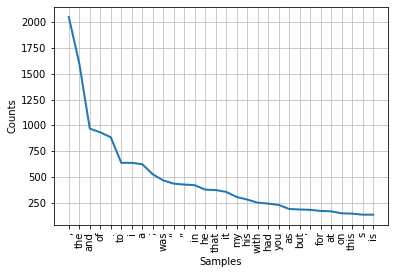

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [135]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_words)
print(fdist.most_common(10))
# Frequency Distribution Plot
fdist.plot(30,cumulative=False)

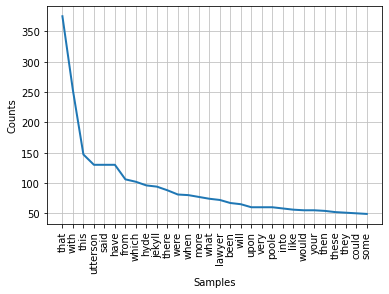

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [136]:
# fem lo mateix que abans pero nomes ens quedem amb les paraules amb 4 o mes lletres
tokenized_large_words = [word for word in tokenized_words if len(word) >= 4]
fdist = FreqDist(tokenized_large_words)
# Frequency Distribution Plot
fdist.plot(30,cumulative=False)

### Nivell 2

- Exercici 1

Treu les stopwords i realitza stemming al teu conjunt de dades.

In [137]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/vant/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [138]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [139]:
from nltk.corpus import stopwords
stop_words=stopwords.words("english")

print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [140]:
'she' in list(stop_words)

True

In [141]:
# anem a treure allo que no sigui signes de puntuació
word_tokens = [word for word in tokenized_words if word not in string.punctuation]


In [143]:
# remove stopwords
filtered_words=[]
for word in word_tokens:
    if word not in stop_words:
        filtered_words.append(word)
#print("unfiltered words:",tokenized_words[:30])
print("filtered words:",filtered_words[:30])

filtered words: ['mr.', 'utterson', 'lawyer', 'man', 'rugged', 'countenance', 'never', 'lighted', 'smile', 'cold', 'scanty', 'embarrassed', 'discourse', 'backward', 'sentiment', 'lean', 'long', 'dusty', 'dreary', 'yet', 'somehow', 'lovable', 'friendly', 'meetings', 'wine', 'taste', 'something', 'eminently', 'human', 'beaconed']


In [144]:
# Stemming
from nltk.stem import PorterStemmer

+ Stemming is a process of linguistic normalization, which reduces words to their word root word or chops off the derivational affixes.

In [145]:
# realitza stemming al conjunt de dades.
ps = PorterStemmer()

stemmed_words=[]
for w in filtered_words:
    stemmed_words.append(ps.stem(w))

print("Stemmed words:",stemmed_words)

Stemmed words: ['mr.', 'utterson', 'lawyer', 'man', 'rug', 'counten', 'never', 'light', 'smile', 'cold', 'scanti', 'embarrass', 'discours', 'backward', 'sentiment', 'lean', 'long', 'dusti', 'dreari', 'yet', 'somehow', 'lovabl', 'friendli', 'meet', 'wine', 'tast', 'someth', 'emin', 'human', 'beacon', 'eye', 'someth', 'inde', 'never', 'found', 'way', 'talk', 'spoke', 'silent', 'symbol', 'after-dinn', 'face', 'often', 'loudli', 'act', 'life', 'auster', 'drank', 'gin', 'alon', 'mortifi', 'tast', 'vintag', 'though', 'enjoy', 'theatr', 'cross', 'door', 'one', 'twenti', 'year', 'approv', 'toler', 'other', 'sometim', 'wonder', 'almost', 'envi', 'high', 'pressur', 'spirit', 'involv', 'misde', 'extrem', 'inclin', 'help', 'rather', 'reprov', '“', 'inclin', 'cain', '’', 'heresi', '”', 'use', 'say', 'quaintli', '“', 'let', 'brother', 'go', 'devil', 'way.', '”', 'charact', 'frequent', 'fortun', 'last', 'reput', 'acquaint', 'last', 'good', 'influenc', 'live', 'downgo', 'men', 'long', 'came', 'chamber

### Nivell 3

- Exercici 1

Realitza sentiment analysis al teu conjunt de dades.

NLTK already has a built-in, pretrained sentiment analyzer called VADER (Valence Aware Dictionary and sEntiment Reasoner).

In [100]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/vant/nltk_data...


True

In [98]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [152]:
sia = SentimentIntensityAnalyzer()

example = 'this course is great'
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249}

+ compound va de -1 (negatiu) a 1  positiu)

In [147]:
from nltk.tokenize import sent_tokenize

In [155]:
book_sentences = sent_tokenize(raw)

In [156]:
len(book_sentences)

956

In [157]:
book_sentences[0]

'Mr. Utterson the lawyer was a man of a rugged countenance that was\nnever lighted by a smile; cold, scanty and embarrassed in discourse;\nbackward in sentiment; lean, long, dusty, dreary and yet somehow\nlovable.'

In [194]:
sia.polarity_scores(book_sentences[0])

{'neg': 0.18, 'neu': 0.718, 'pos': 0.103, 'compound': -0.2523}

In [165]:
overall_compound = []
for sentence in book_sentences:
    outcome = sia.polarity_scores(sentence)['compound']
    overall_compound.append(outcome)

<AxesSubplot:ylabel='Count'>

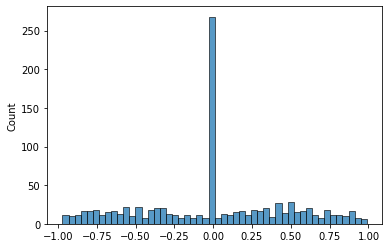

In [203]:
sns.histplot(overall_compound,bins=50)

In [195]:
total = np.asarray(overall_compound)

print(f'% negative sentences = {round(len(total[total<0])/len(overall_compound)*100,1)} %')
print(f'% positive sentences = {round(len(total[total>0])/len(overall_compound)*100,1)} %')
print(f'% neutral sentences = {round(len(total[total==0])/len(overall_compound)*100,1)} %')

% negative sentences = 34.9 %
% positive sentences = 37.7 %
% neutral sentences = 27.4 %


 + he analitzat cada frase del llibre per extreure el valor de compound
 + et pot mirar mean o la mitjana per veure si la majoria de frases tenen tendencia positiva o no

    

In [196]:
# aquesta llibreria tambe explora sentiment analysis
from textblob import TextBlob

In [200]:
TextBlob(book_sentences[0]).sentiment

Sentiment(polarity=-0.05, subjectivity=0.52)

In [201]:
overall_polarity = []
for sentence in book_sentences:
    outcome = TextBlob(sentence).sentiment.polarity
    overall_polarity.append(outcome)

<AxesSubplot:ylabel='Count'>

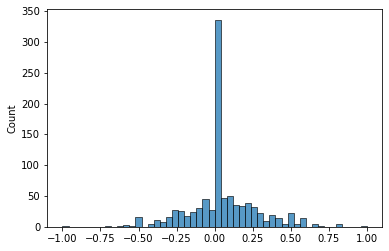

In [204]:
sns.histplot(overall_polarity,bins=50)